In [1]:
dataset_name = "W14_comb"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

del BES_Panel

Toggle code

In [2]:
BES_census_data_2019 = pd.read_stata( BES_small_data_files + "BES-2019-General-Election-results-file-v1.0.dta" )
print("BES_census_data 2019", BES_census_data_2019.shape )

BES_census_data_2017 = pd.read_stata( BES_small_data_files + "BES-2017-General-Election-results-file-v1.0.dta" )
print("BES_census_data", BES_census_data_2017.shape )

BES_census_data_2015 = pd.read_stata( BES_small_data_files + "BES-2015-General-Election-results-file-v2.21.dta" )
print("BES_census_data 2015", BES_census_data_2015.shape )

BES_census_data = BES_census_data_2019.copy()

#### BUG! -> check if in latest release, if yes, then tell them! ###########
BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"] =\
    BES_census_data.loc[BES_census_data["Country"].isin(["Scotland"]),"c11Households"]*100
BES_census_data["ConstituencyName"] = BES_census_data["ConstituencyName"].replace("Ynys Môn","Ynys Mon")
BES_census_data["Winner15"] = BES_census_data["Winner15"].replace("Speaker.","Speaker")

BES_census_data[search(BES_census_data_2015,"SpendPercent").index] = BES_census_data_2015[search(BES_census_data_2015,"SpendPercent").index]

BES_census_data[['SNPLongSpendPercent', 'SNPShortSpendPercent',
       'PCLongSpendPercent', 'PCShortSpendPercent']] = BES_census_data[['SNPLongSpendPercent', 'SNPShortSpendPercent',
       'PCLongSpendPercent', 'PCShortSpendPercent']].replace(".",np.nan).astype('float')

BES_census_data 2019 (632, 385)
BES_census_data (632, 308)
BES_census_data 2015 (632, 277)


In [3]:
party_19_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)19$").index
BES_census_data[[x+"_elec" for x in party_19_list]] = BES_census_data[party_19_list].apply(lambda x: x*BES_census_data["Turnout19"]/100).fillna(0)
BES_census_data["DNV19_elec"] = 100-BES_census_data["Turnout19"]
BES_census_data["DNV&OTH19_elec"] = 100-BES_census_data["Turnout19"]-BES_census_data["Other19"].fillna(0)
BES_census_data["Auth_Right19_elec"] = BES_census_data["Con19_elec"]+BES_census_data["UKIP19_elec"]+BES_census_data["Brexit19_elec"]
BES_census_data["Lib_Left19_elec"] = BES_census_data["Lab19_elec"]+BES_census_data["LD19_elec"]+BES_census_data["PC19_elec"]+BES_census_data["SNP19_elec"]+BES_census_data["Green19_elec"]

party_17_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)17$").index
BES_census_data[[x+"_elec" for x in party_17_list]] = BES_census_data[party_17_list].apply(lambda x: x*BES_census_data["Turnout17"]/100).fillna(0)
BES_census_data["DNV17_elec"] = 100-BES_census_data["Turnout17"]
BES_census_data["DNV&OTH17_elec"] = 100-BES_census_data["Turnout17"]-BES_census_data["Other17"].fillna(0)
BES_census_data["Auth_Right17_elec"] = BES_census_data["Con17_elec"]+BES_census_data["UKIP17_elec"]#+BES_census_data["Brexit17_elec"]
BES_census_data["Lib_Left17_elec"] = BES_census_data["Lab17_elec"]+BES_census_data["LD17_elec"]+BES_census_data["PC17_elec"]\
                                    +BES_census_data["SNP17_elec"]+BES_census_data["Green17_elec"]

party_15_list = search(BES_census_data,"^(Con|Lab|Brexit|LD|UKIP|SNP|PC|Green)15$").index
BES_census_data[[x+"_elec" for x in party_15_list]] = BES_census_data[party_15_list]\
                                    .apply(lambda x: x*BES_census_data["Turnout15"]/100).fillna(0)
BES_census_data["DNV15_elec"] = 100-BES_census_data["Turnout15"]
BES_census_data["DNV&OTH15_elec"] = 100-BES_census_data["Turnout15"]-BES_census_data["Other15"].fillna(0)
BES_census_data["Auth_Right15_elec"] = BES_census_data["Con15_elec"]+BES_census_data["UKIP15_elec"]#+BES_census_data["Brexit17_elec"]
BES_census_data["Lib_Left15_elec"] = BES_census_data["Lab15_elec"]+BES_census_data["LD15_elec"]+BES_census_data["PC15_elec"]\
                                    +BES_census_data["SNP15_elec"]+BES_census_data["Green15_elec"]

party_10_list = search(BES_census_data,"^(Con|Lab|BNP|LD|UKIP|SNP|PC|Green)10$").index
BES_census_data[[x+"_elec" for x in party_10_list]] = BES_census_data[party_10_list].apply(lambda x: x*BES_census_data["Turnout10"]/100).fillna(0)
BES_census_data["DNV10_elec"] = 100-BES_census_data["Turnout10"]
BES_census_data["DNV&OTH10_elec"] = 100-(BES_census_data[party_10_list].apply(lambda x: x*BES_census_data["Turnout10"]/100).sum(axis=1))
BES_census_data["Auth_Right10_elec"] = BES_census_data["Con10_elec"]+BES_census_data["UKIP10_elec"]+BES_census_data["BNP10_elec"]
BES_census_data["Lib_Left10_elec"] = BES_census_data["Lab10_elec"]+BES_census_data["LD10_elec"]+BES_census_data["PC10_elec"]\
                                    +BES_census_data["SNP10_elec"]+BES_census_data["Green10_elec"]

party_05_list = search(BES_census_data,"^(Con|Lab|BNP|LD|UKIP|SNP|PC|Green)05$").index
BES_census_data[[x+"_elec" for x in party_05_list]] = BES_census_data[party_05_list].apply(lambda x: x*BES_census_data["Turnout05"]/100).fillna(0)
BES_census_data["DNV05_elec"] = 100-BES_census_data["Turnout05"]
BES_census_data["DNV&OTH05_elec"] = 100-BES_census_data["Turnout05"]-BES_census_data["Other05"].fillna(0)
BES_census_data["Auth_Right05_elec"] = BES_census_data["Con05_elec"]+BES_census_data["UKIP05_elec"]+BES_census_data["BNP05_elec"]
BES_census_data["Lib_Left05_elec"] = BES_census_data["Lab05_elec"]+BES_census_data["LD05_elec"]+BES_census_data["PC05_elec"]\
                                    +BES_census_data["SNP05_elec"]+BES_census_data["Green05_elec"]


In [4]:
welsh_df = pd.read_excel( open(BES_small_data_files+'welsh_constituency_data.xls','rb'), sheet_name='WelshLanguage' )
welsh_df.columns = welsh_df.loc[4]
welsh_df = welsh_df.drop([0,1,2,3,4,50,51,52])
welsh_df = welsh_df.replace("Ynys Môn","Ynys Mon")
welsh_df = welsh_df.set_index("Assembly Constituency Area")
BES_census_data["speakWelsh"] = [welsh_df.loc[x,"Percentage aged 3+ who can speak Welsh"] if x in welsh_df.index else 0 for x in BES_census_data["ConstituencyName"]  ]

occ_df = pd.read_excel( open(BES_small_data_files+'Census2011-ConstituencyProfile-uk.xlsx','rb'), sheet_name='KS608D' )
occ_df.columns = occ_df.loc[3]
occ_df = occ_df.drop([0,1,2,3,654,])
# occ_df

var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
 "CON%PROF","CON%MAN_DIR_SEN"]

# occ_df = occ_df.set_index("ONSConstID").loc[merged.index]
# var_list = ["CON%ELEM","CON%OPS","CON%SAL_SERV","CON%CAR_LEI_","CON%SKILL","CON%ADMIN_SEC","CON%ASSOC_PROF_TECH",
#  "CON%PROF","CON%MAN_DIR_SEN"]

BES_census_data[var_list] = occ_df.set_index("ONSConstID").loc[BES_census_data["ONSConstID"]][var_list].values

merseyside = ["Birkenhead","Bootle","Garston and Halewood","Knowsley",
             "Liverpool, Riverside","Liverpool, Walton","Liverpool, Wavertree","Liverpool, West Derby",
             "Sefton Central","Southport","St Helens North","St Helens South and Whiston",
             "Wallasey","Wirral South","Wirral West"]

BES_census_data["Merseyside"] = BES_census_data["ConstituencyName"].isin(merseyside).astype('float')

In [5]:
df = pd.read_csv(BES_small_data_files+"CentreForTowns"+os.sep+"pcon-classification-csv.csv")

# https://www.centrefortowns.org/our-towns
    
# Type	Definition	Number
# Villages (less than 5,000)	Places with less than 5,000 residents	5,568
# Communities (5-10k)	Places with between 5,000 and 10,000 residents	567
# Small towns (10k-30k)	Towns with between 10,000 and 30,000 residents	550
# Medium towns (30k – 75k)	Towns with between 30,000 and 75,000 residents	242
# Large towns (over 75k)	Towns with over 75,000 residents	102
# Core Cities	Core cities as defined by Pike et al (2016)	12

## doesn't seem so consisent - where is 'communities!'
replace_dict = {"Village or Smaller":"Village or smaller",}
df["classification"] = df["classification"].replace(replace_dict)
centre_for_towns = df.pivot(index='constituency_code', columns='classification', values='percent_of_constituency').fillna(0)
BES_census_data[centre_for_towns.columns] = centre_for_towns.loc[BES_census_data["ONSConstID"]].values

In [6]:
parl_con_aggs = pd.read_csv(BES_small_data_files+"parliamentary constituency data"+os.sep+"Lots of aggregated parliamentary data.csv")

parl_con_aggs = parl_con_aggs.set_index("ONSConstID").drop(['Unnamed: 0', 'pano',
 'RESULTS2019_OTHER', 'RESULTS2019_Registered Voters', 'YOUGOVMRP_DEC_Con', 'YOUGOVMRP_DEC_Lab', 'YOUGOVMRP_DEC_LD',
       'YOUGOVMRP_DEC_Brexit', 'YOUGOVMRP_DEC_Green', 'YOUGOVMRP_DEC_SNP',
       'YOUGOVMRP_DEC_PC', 'YOUGOVMRP_DEC_Other', 'YOUGOVMRP_NOV_Con',
       'YOUGOVMRP_NOV_Lab', 'YOUGOVMRP_NOV_LD', 'YOUGOVMRP_NOV_Brexit',
       'YOUGOVMRP_NOV_Green', 'YOUGOVMRP_NOV_SNP', 'YOUGOVMRP_NOV_PC',
       'YOUGOVMRP_NOV_Other', 'ConVote17', 'TotalVote17', 'RejectedVote17',
       'Electorate17', 'ConVote15', 'TotalVote15', 'RejectedVote15',
       'Electorate15', 'ConVote10', 'TotalVote10', 'Electorate10',
       'c11Population','RESULTS2019_CON', 'RESULTS2019_LAB',
       'RESULTS2019_LIBDEM', 'RESULTS2019_GRN', 'RESULTS2019_SNP',
       'RESULTS2019_PC', 'RESULTS2019_BXP', 'RESULTS2019_UKIP',
       'RESULTS2019_Turnout','Turn10'],axis=1).select_dtypes(['float64','int64'])
parl_con_aggs = parl_con_aggs.drop(set(parl_con_aggs.columns).intersection(set(BES_census_data.columns)),axis=1)
parl_con_aggs = parl_con_aggs.loc[BES_census_data["ONSConstID"]]

BES_census_data[parl_con_aggs.columns] = parl_con_aggs.values
BES_census_data.columns = [x.replace("<","LT") for x in BES_census_data.columns]

In [7]:
BES_constituency_aggregates = pd.read_csv(BES_small_data_files+"parliamentary constituency data"+os.sep+"BES_constituency_aggregates.csv")
BES_constituency_aggregates = BES_constituency_aggregates.set_index("ons_const_id").drop(["Unnamed: 0","constituency_name","pano"],axis=1).loc[BES_census_data["ONSConstID"]]
# (632, 6868)

## a lot - won't add before testing!
nomis_dump = pd.read_csv(BES_data_folder+"Nomis"+os.sep+"2011ONS_England&Wales_by_parlcon.csv")
nomis_dump = nomis_dump.set_index("Unnamed: 0").loc[BES_census_data["ONSConstID"][~BES_census_data["Country"].isin(["Scotland"])]]
## England&Wales

In [8]:
drop_cols = ['Winner17', 'Winner15', 'Winner10','pano',#category
            'ConVote17', 'TotalVote17', 'Electorate17', 'ConVote15', 'TotalVote15',
       'Electorate15', 'ConVote10', 'TotalVote10', 'Electorate10', #int
             'LabVote19', 'Electorate19','RejectedVote19','LabVote05',
              'Lab17', 'LD17', 'SNP17', 'PC17', 'UKIP17', 'Green17',
             'Con0510', 'Lab0510', 'LD0510', 'SNP0510', 'PC0510',
       'BNP0510', 'UKIP0510', 'Green0510',
             'Con19', 'Lab19', 'LD19', 'SNP19', 'PC19', 'UKIP19', 'Green19',
       'Brexit19', 'Other19', 'Majority19', 'Turnout19', 'TotalVote19',
       'Con1719', 'Lab1719', 'LD1719', 'SNP1719', 'PC1719', 'UKIP1719',
       'Green1719',
             'ConVote19', 'LDVote19', 'SNPVote19', 'PCVote19', 'UKIPVote19',
       'GreenVote19', 'BrexitVote19',
             'leaveHanretty', 'remainHanretty',
             'Con05', 'Lab05', 'LD05', 'SNP05', 'PC05', 'UKIP05',
       'Green05', 'BNP05', 'Other05', 'Majority05', 'Turnout05', 'ConVote05',
       'LDVote05', 'SNPVote05', 'PCVote05', 'UKIPVote05', 'GreenVote05',
       'BNPVote05',
             'Winner05', 'ConPPCsex19', 'LabPPCsex19',
       'LDPPCsex19', 'SNPPPCsex19', 'PCPPCsex19', 'UKIPPPCsex19',
       'GreenPPCsex19', 'BrexitPPCsex19',
             # 'Con17',
       'Other17', 'Majority17', 'Turnout17', 'LabVote17', 'LDVote17',
       'SNPVote17', 'PCVote17', 'UKIPVote17', 'GreenVote17', 'Con1517',
       'Lab1517', 'LD1517', 'SNP1517', 'PC1517', 'UKIP1517', 'Green1517',
       'Con15', 'Lab15', 'LD15', 'SNP15', 'PC15', 'UKIP15', 'Green15',
       'Other15', 'Majority15', 'Turnout15', 'LabVote15', 'LDVote15',
       'SNPVote15', 'PCVote15', 'UKIPVote15', 'GreenVote15', 'BNPVote15',
       'Con1015', 'Lab1015', 'LD1015', 'SNP1015', 'PC1015', 'UKIP1015',
       'Green1015', 'Con10', 'Lab10', 'LD10', 'SNP10', 'PC10', 'UKIP10',
       'Green10', 'BNP10', 'Majority10', 'LabVote10', 'LDVote10',
       'SNPVote10', 'PCVote10', 'UKIPVote10', 'GreenVote10', 'BNPVote10',## float
       'ONSConstID', 'ConstituencyName', 'SeatChange1517', 'SeatChange1015',
       'ConPPC17', 'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17',
       'GreenPPC17', 'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15',
       'UKIPPPC15', 'GreenPPC15',     # object
       'ONSConstID', 'ConstituencyName', 'SeatChange1719', 'SeatChange1517',
       'SeatChange1015', 'ConPPC19', 'LabPPC19', 'LDPPC19', 'SNPPPC19',
       'PCPPC19', 'UKIPPPC19', 'GreenPPC19', 'BrexitPPC19', 'ConPPC17',
       'LabPPC17', 'LDPPC17', 'SNPPPC17', 'PCPPC17', 'UKIPPPC17', 'GreenPPC17',
       'ConPPC15', 'LabPPC15', 'LDPPC15', 'SNPPPC15', 'PCPPC15', 'UKIPPPC15',
       'GreenPPC15',
             'ConLongSpendPercent',
       'ConShortSpendPercent', 'LabLongSpendPercent', 'LabShortSpendPercent',
       'LDLongSpendPercent', 'LDShortSpendPercent', 'SNPLongSpendPercent',
       'SNPShortSpendPercent', 'PCLongSpendPercent', 'PCShortSpendPercent',
       'UKIPLongSpendPercent', 'UKIPShortSpendPercent',
       'GreenLongSpendPercent', 'GreenShortSpendPercent',
             'FOCALDATAMRP_DEC_Conservative',
 'FOCALDATAMRP_DEC_Labour',
 'FOCALDATAMRP_DEC_Liberal Democrats',
 'FOCALDATAMRP_DEC_SNP',
 'FOCALDATAMRP_DEC_Other',
 'FOCALDATAMRP_DEC_Green',
 'FOCALDATAMRP_DEC_Brexit Party',
 'FOCALDATAMRP_DEC_Plaid Cymru',
        'Winner19',
             'POLCOMP_Ec-Left-Right', 'POLCOMP_Soc-Lib-Con',
             'Turnout10',
            ]+['Con19_elec', 'Lab19_elec',
       'LD19_elec', 'SNP19_elec', 'PC19_elec', 'UKIP19_elec', 'Green19_elec',
       'Brexit19_elec', 'DNV19_elec', 'DNV&OTH19_elec', 'Auth_Right19_elec',
       'Lib_Left19_elec', 'Con17_elec', 'Lab17_elec', 'LD17_elec',
       'SNP17_elec', 'PC17_elec', 'UKIP17_elec', 'Green17_elec', 'DNV17_elec',
       'DNV&OTH17_elec', 'Auth_Right17_elec', 'Lib_Left17_elec', 'Con15_elec',
       'Lab15_elec', 'LD15_elec', 'SNP15_elec', 'PC15_elec', 'UKIP15_elec',
       'Green15_elec', 'DNV15_elec', 'DNV&OTH15_elec', 'Auth_Right15_elec',
       'Lib_Left15_elec', 'Con10_elec', 'Lab10_elec', 'LD10_elec',
       'SNP10_elec', 'PC10_elec', 'UKIP10_elec', 'Green10_elec', 'BNP10_elec',
       'DNV10_elec', 'DNV&OTH10_elec', 'Auth_Right10_elec', 'Lib_Left10_elec',
       'Con05_elec', 'Lab05_elec', 'LD05_elec', 'SNP05_elec', 'PC05_elec',
       'UKIP05_elec', 'Green05_elec', 'BNP05_elec', 'DNV05_elec',
       'DNV&OTH05_elec', 'Auth_Right05_elec', 'Lib_Left05_elec']+['TotalVote19',
                                                                  'TotalVote17', 'TotalVote15', 'TotalVote10',
       'TotalVote05','CLOCKFACEREP_diversity', 'CLOCKFACEREP_security',
       'CLOCKFACEREP_fecundity', 'CLOCKFACEREP_diversity_flatter',
       'CLOCKFACEREP_security_flatter',
        'LL17_elec', 'G-L-L17_elec','G-L17_elec',
        "LL15_elec","LL10_elec","LL05_elec",
        "G-L15_elec","G-L10_elec","G-L05_elec",
        "Con17",
                                                ]

# 'c11Population'

# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

In [9]:
import geopandas as gpd
# set the filepath and load in a shapefile
fp = BES_small_data_files+"very_very_simplified_wpc.json"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()
# now let's preview what our map looks like with no data in it
# map_df.plot();
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("PCON13CD").join(BES_census_data.set_index("ONSConstID"))
merged = merged.loc[BES_census_data["ONSConstID"]]
# merged.head()

In [10]:
df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1,errors='ignore'))
df_simp = df_simp.fillna(df_simp.mean())
df_simp = df_simp.dropna(axis=1)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import statsmodels.api as sm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import LeaveOneOut

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [11]:

jk_list = ["c11Deprived3","c11QualLevel4","c11Age60to64","CON%MAN_DIR_SEN","CON%SAL_SERV","Merseyside","speakWelsh"]
dataset = merged[merged["Country"].isin(["England","Wales"])]

Y = dataset['Con17']/100
X = dataset[jk_list].astype('float')
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Con17   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     510.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.42e-239
Time:                        20:41:02   Log-Likelihood:                 846.73
No. Observations:                 573   AIC:                            -1677.
Df Residuals:                     565   BIC:                            -1643.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8504      0.049     17.482      0.000       0.755       0.946
c11Deprived3       -0.0427      0.002    -22.993      0.000      -0.046      -0.039
c11QualLevel4      -0.0122      0.001    -21.162      0.000      -0.013      -0.011
c11Age60to64       -0.0043      0.003     -1.415      0.158      -0.010       0.002
CON%MAN_DIR_SEN     0.0281      0.002     13.805      0.000       0.024       0.032
CON%SAL_SERV       -0.0147      0.002     -6.165      0.000      -0.019      -0.010
Merseyside         -0.0972      0.015     -6.391      0.000      -0.127      -0.067
speakWelsh         -0.2954      0.038     -7.813      0.000      -0.370      -0.221
==============================================================================
Omnibus:                       20.799   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.471
Skew:                          -0.374   Prob(JB):                     2.95e-06
Kurtosis:                       3.713   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:


boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

Features: 377/377


Best subset: (0, 1, 4, 6, 7, 8, 9, 10, 11, 12)


In [14]:


iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=LeaveOneOut()) ### Use cross-validation generator here

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.96
Best subset (indices): (3,)
Best subset (corresponding names): ('3',)


In [22]:
search(BES_census_data,"Con17")
# 

Con1719       630
Con17         632
Con17_elec    632
dtype: int64

In [26]:


# boston = load_boston()
X, y = df_simp[df_simp.columns[0:10]], BES_census_data["Con17_elec"]

lr = LinearRegression()

efs = EFS(lr, 
          min_features=5,
          max_features=7,
          scoring='r2',
          #'neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

Features: 582/582


Best subset: (1, 3, 4, 7, 9)


best combination (ACC: 0.907): (57, 61, 115, 121, 146, 174, 175, 178, 186, 187, 188, 198, 207, 255, 289, 308, 333, 402, 411, 437)

all subsets:
 {1: {'feature_idx': (186,), 'cv_scores': array([0.70855689, 0.5298421 , 0.7266402 , 0.36455011, 0.7913058 ,
       0.66664193, 0.57075489, 0.66846774, 0.69869109, 0.67242763]), 'avg_score': 0.6397878375779871, 'feature_names': ('c11Deprived3',)}, 2: {'feature_idx': (175, 186), 'cv_scores': array([0.79595372, 0.67143777, 0.75423911, 0.60389979, 0.82395245,
       0.77105784, 0.70403545, 0.72443816, 0.79538397, 0.72005754]), 'avg_score': 0.7364455807039526, 'feature_names': ('c11HealthVeryGood', 'c11Deprived3')}, 3: {'feature_idx': (121, 175, 186), 'cv_scores': array([0.80671707, 0.779802  , 0.80205282, 0.72397009, 0.86080919,
       0.84454429, 0.78698957, 0.77323255, 0.80273908, 0.81424509]), 'avg_score': 0.7995101740955749, 'feature_names': ('c11NSSECHigherManager', 'c11HealthVeryGood', 'c11Deprived3')}, 4: {'feature_idx': (61, 121, 175, 186)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14b4bcab108>)

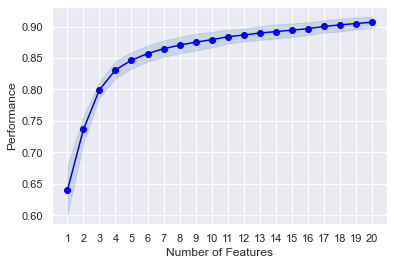

In [39]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# boston = load_boston()
X, y = df_simp, BES_census_data["Con17_elec"]

lr = LinearRegression()

efs = SFS(lr, 
          k_features=(1, 20), 
#           min_features=5,
#           max_features=7,
          forward=True,
          floating=False,
          scoring='r2',
          #'neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (efs.k_score_, efs.k_feature_idx_))
print('all subsets:\n', efs.subsets_)
plot_sfs(efs.get_metric_dict(), kind='std_err');

In [13]:

mask = (BES_census_data["Country"]=="England") & (BES_census_data["Winner19"].apply(lambda x: x not in ["Speaker","Green"]))
X, y = df_simp[mask], BES_census_data["Con17_elec"][mask]

In [14]:
%%time
lr = LinearRegression()

efs = SFS(lr, 
          k_features=(1, 20), 
          forward=True,
          floating=False,
          scoring='r2',
          cv=5,n_jobs=-1)

efs.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (efs.k_score_, efs.k_feature_idx_))
print('all subsets:\n', efs.subsets_)
plot_sfs(efs.get_metric_dict(), kind='std_err');

best combination (ACC: 0.923): (20, 24, 29, 52, 60, 79, 88, 115, 121, 122, 149, 162, 164, 174, 186, 198, 207, 229, 238, 295)

all subsets:
 {1: {'feature_idx': (60,), 'cv_scores': array([0.72247296, 0.69971418, 0.80247759, 0.72009227, 0.78015588]), 'avg_score': 0.7449825747699399, 'feature_names': ('c11CarsThree',)}, 2: {'feature_idx': (60, 186), 'cv_scores': array([0.80065428, 0.81048797, 0.85097334, 0.76829699, 0.82305885]), 'avg_score': 0.8106942872287076, 'feature_names': ('c11CarsThree', 'c11Deprived3')}, 3: {'feature_idx': (60, 164, 186), 'cv_scores': array([0.83835473, 0.82064347, 0.87945603, 0.81474181, 0.8257681 ]), 'avg_score': 0.835792829849999, 'feature_names': ('c11CarsThree', 'c11IndustryEducation', 'c11Deprived3')}, 4: {'feature_idx': (24, 60, 164, 186), 'cv_scores': array([0.86271437, 0.84765177, 0.89963067, 0.8049215 , 0.85334909]), 'avg_score': 0.8536534816728457, 'feature_names': ('c11Age90plus', 'c11CarsThree', 'c11IndustryEducation', 'c11Deprived3')}, 5: {'feature_

NameError: name 'plot_sfs' is not defined

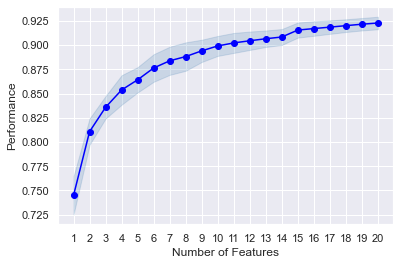

In [17]:
plot_sfs(efs.get_metric_dict(), kind='std_err');

In [18]:
# %%time
# lr = LinearRegression()

# efs = SFS(lr, 
#           k_features=(1, 20), 
#           forward=False,
#           floating=False,
#           scoring='r2',
#           cv=5,n_jobs=-1)

# efs.fit(X, y)

# print('best combination (ACC: %.3f): %s\n' % (efs.k_score_, efs.k_feature_idx_))
# print('all subsets:\n', efs.subsets_)
# plot_sfs(efs.get_metric_dict(), kind='std_err');

In [15]:
%%time
lr = LinearRegression()

efs = SFS(lr, 
          k_features=(1, 20), 
          forward=True,
          floating=True,
          scoring='r2',
          cv=5,n_jobs=-1)

efs.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (efs.k_score_, efs.k_feature_idx_))
print('all subsets:\n', efs.subsets_)
plot_sfs(efs.get_metric_dict(), kind='std_err');

best combination (ACC: 0.923): (20, 24, 29, 60, 79, 81, 88, 121, 149, 162, 164, 174, 186, 198, 207, 229, 238, 295, 400, 425)

all subsets:
 {1: {'feature_idx': (60,), 'cv_scores': array([0.72247296, 0.69971418, 0.80247759, 0.72009227, 0.78015588]), 'avg_score': 0.7449825747699399, 'feature_names': ('c11CarsThree',)}, 2: {'feature_idx': (60, 186), 'cv_scores': array([0.80065428, 0.81048797, 0.85097334, 0.76829699, 0.82305885]), 'avg_score': 0.8106942872287076, 'feature_names': ('c11CarsThree', 'c11Deprived3')}, 3: {'feature_idx': (60, 164, 186), 'cv_scores': array([0.83835473, 0.82064347, 0.87945603, 0.81474181, 0.8257681 ]), 'avg_score': 0.835792829849999, 'feature_names': ('c11CarsThree', 'c11IndustryEducation', 'c11Deprived3')}, 4: {'feature_idx': (24, 60, 164, 186), 'cv_scores': array([0.86271437, 0.84765177, 0.89963067, 0.8049215 , 0.85334909]), 'avg_score': 0.8536534816728457, 'feature_names': ('c11Age90plus', 'c11CarsThree', 'c11IndustryEducation', 'c11Deprived3')}, 5: {'feature_

NameError: name 'plot_sfs' is not defined

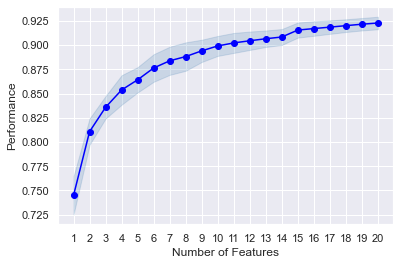

In [20]:
plot_sfs(efs.get_metric_dict(), kind='std_err');

In [19]:
# %%time
# lr = LinearRegression()

# efs = SFS(lr, 
#           k_features=(1, 20), 
#           forward=False,
#           floating=True,
#           scoring='r2',
#           cv=5,n_jobs=-1)

# efs.fit(X, y)

# print('best combination (ACC: %.3f): %s\n' % (efs.k_score_, efs.k_feature_idx_))
# print('all subsets:\n', efs.subsets_)
# plot_sfs(efs.get_metric_dict(), kind='std_err');

In [ ]:
## backwards selection will be *waay too slow* unless you start with a much smaller set of variables

## I think you probably need a custom score to also include 'condition no'